In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from custom_scripts.config import loader
from custom_scripts.evaluate_performance import *
from custom_scripts.prepare_data import prepare_data

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import KFold

import xgboost as xgb

## Load the pretrained xgboost model

Use the following snippet of code to load the xgboost model for further analysis. 

In [8]:
model_day_of_week = 'Wednesday'

day_of_week = 'Wednesday'

In [9]:
filename='./models/xgb_model_'+model_day_of_week+'.pkl'

with open(filename,'rb') as file:
    xgb_model=pickle.load(file)

We also obtain the feature important plot of the loaded model.

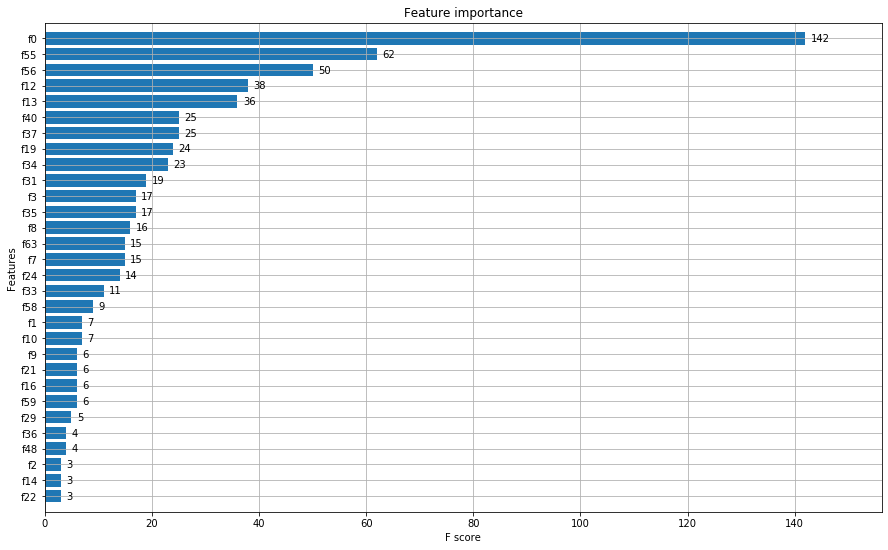

In [10]:
fig, ax = plt.subplots(figsize=(15,9))
xgb.plot_importance(xgb_model, max_num_features=30, height=0.8, ax=ax)
plt.show()

## Load the data

In [54]:
data_file= loader(day_of_week=day_of_week,data_type='processed',subtype='Normalized')

df=pd.read_pickle(data_file)

## Preparing the Dataset for Classification 

Here we need to separate our class variable, which in our case is "Label" from the rest of the dataset.

In [55]:
X,y=prepare_data(data=df,class_column='Label',classes='binary',neg_class='BENIGN')

## Prediction and evaluation of performance measures

Three performance measures to be saved are 

1. Confusion matrix
2. Accuracy
3. AUC score

In [56]:
cm = []
acc = []
auc_score = []
f1 =[]

y_pred = xgb_model.predict(X)
    
cm.append(confusion_matrix(y,y_pred))
acc.append(accuracy_score(y,y_pred))
auc_score.append(roc_auc_score(y,y_pred))    
f1.append(f1_score(y,y_pred,average='binary'))

In [57]:
display_scores(acc)

Scores: [0.9983454005316702]
Mean: 0.998
Std: 0.000


In [58]:
display_scores(auc_score)

Scores: [0.9985445215426464]
Mean: 0.999
Std: 0.000


In [59]:
display_scores(f1)

Scores: [0.997731176099606]
Mean: 0.998
Std: 0.000


In [60]:
cm

[array([[438721,    962],
        [   182, 251541]], dtype=int64)]